## Bangalore_House_Price_Pridiction_Project

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\ML Datasets\\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.shape

(13320, 9)

In [5]:
for column in df.columns:
  print(df[column].value_counts())
  print("*"*20  )

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
********************
siz

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [10]:
df['location'].value_counts()

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [11]:
df['location']=df['location'].fillna('Sarjapur Road')

In [12]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [13]:
df['size']=df['size'].fillna('2 BHK')

In [14]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [16]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [17]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [19]:
def convertRange(x):
  temp=x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None


In [20]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [21]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [23]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [24]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [25]:
df['location'].value_counts()

location
Whitefield                                      540
Sarjapur  Road                                  399
Electronic City                                 302
Kanakpura Road                                  273
Thanisandra                                     234
                                               ... 
Maragondana Halli, kr puram, old madras road      1
Chikkajala                                        1
Udayagiri                                         1
pavitra paradise                                  1
Chikbasavanapura                                  1
Name: count, Length: 1306, dtype: int64

In [26]:
df['location']=df['location'].apply(lambda x:x.strip())
location_count=df['location'].value_counts()

In [27]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

location
1st Block Koramangala     10
Dairy Circle              10
Nagadevanahalli           10
Sadashiva Nagar           10
Naganathapura             10
                          ..
Xavier Layout              1
Ramanagara Channapatna     1
Maheswari Nagar            1
Hsr layout sector3         1
Thyagraj Nagar             1
Name: count, Length: 1054, dtype: int64

In [28]:
df['location']=df['location'].apply(lambda x:'other' if x in location_count_less_10 else x)

In [29]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [30]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [31]:
df=df[((df['total_sqft']/df['bhk'])>=300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [32]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [33]:
df.price_per_sqft.describe()


count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_outliers_sqft(df):
  df_output=pd.DataFrame()
  # Group the input DataFrame by 'location' to process each location independently.
  for key,subdf in df.groupby('location'):
    # Calculate the mean of 'price_per_sqft' for the current location group.
    m=np.mean(subdf.price_per_sqft)
    # Calculate the standard deviation of 'price_per_sqft' for the current location group.
    st=np.std(subdf.price_per_sqft)
    # Filter the sub-DataFrame, keeping only rows where 'price_per_sqft' is within one standard deviation from the mean.
    # This is a common method for removing outliers based on the Z-score (or simply standard deviation from the mean).
    gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    # Concatenate the filtered DataFrame for the current location to the overall output DataFrame.
    df_output=pd.concat([df_output,gen_df],ignore_index=True)
  # Return the DataFrame with outliers removed.
  return df_output

# Apply the outlier removal function to the main DataFrame 'df' and reassign the result to 'df'.
df=remove_outliers_sqft(df)
# Display descriptive statistics of the modified DataFrame to see the impact of outlier removal.
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [35]:
def bhk_outliers_remover(df):
  # Initialize an empty numpy array to store the indices of rows to be excluded (outliers).
  exclude_indices=np.array([])
  # Iterate through each unique 'location' and its corresponding DataFrame subset.
  for location,location_df in df.groupby('location'):
    # Initialize a dictionary to store statistics (mean, std dev, count) for each 'bhk' (bedroom, hall, kitchen) configuration within the current location.
    bhk_stats={}
    # For each location, iterate through each unique 'bhk' value and its corresponding DataFrame subset.
    for bhk,bhk_df in location_df.groupby('bhk'):
      # Calculate the mean, standard deviation, and count of 'price_per_sqft' for the current 'bhk' group.
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    # Again, iterate through each unique 'bhk' value and its DataFrame subset within the current location.
    for bhk,bhk_df in location_df.groupby('bhk'):
      # Get the statistics for a 'bhk' value that is one less than the current 'bhk' (e.g., if current bhk is 3, get stats for bhk 2).
      stats=bhk_stats.get(bhk-1)
      # If statistics for 'bhk-1' exist and the count of properties for 'bhk-1' is greater than 5 (to ensure sufficient data for comparison):
      if stats and stats['count']>5:
        # Identify properties in the current 'bhk' group whose 'price_per_sqft' is less than the mean 'price_per_sqft' of the 'bhk-1' group.
        # These are considered outliers because a property with more bedrooms should typically not be cheaper per square foot than a property with fewer bedrooms in the same location.
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  # Drop the identified outlier rows from the DataFrame using their indices and return the filtered DataFrame.
  return df.drop(exclude_indices,axis='index')

In [36]:
df=bhk_outliers_remover(df)

In [37]:
df.shape

(7361, 7)

In [38]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [39]:
df.drop(columns=['size','price_per_sqft'],inplace=True)# price_per_sqft ye outliers remove karne ke liye banaya gaya tha

In [40]:
df

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10292,other,1200.0,2.0,70.0,2
10293,other,1800.0,1.0,200.0,1
10296,other,1353.0,2.0,110.0,2
10297,other,812.0,1.0,26.0,1


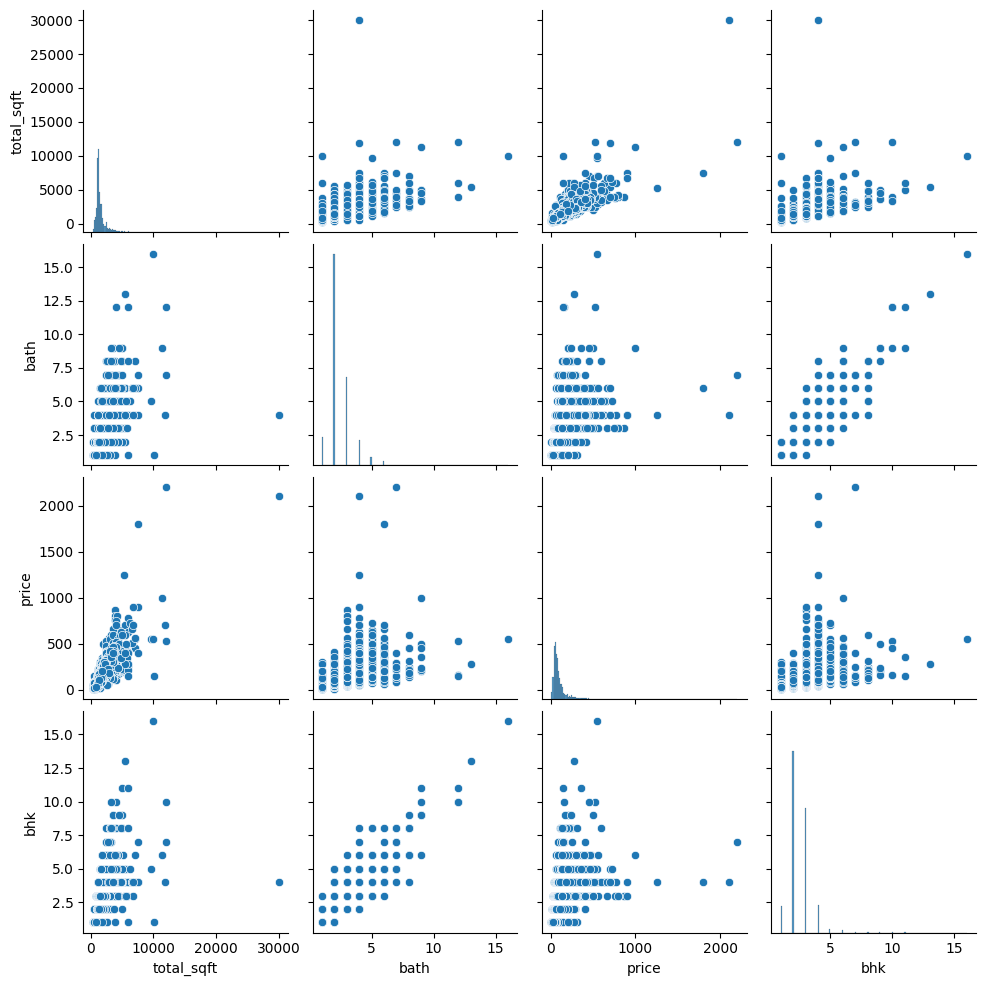

In [41]:
import seaborn as sns
sns.pairplot(df)

In [42]:
df.to_csv("Cleaned_data.csv")

In [43]:
X=df.drop(columns=['price'])
y=df['price']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
print(X_train.shape)
print(X_test.shape )

(5888, 4)
(1473, 4)


## Applying Linear Regression

In [47]:
column_trans=make_column_transformer((OneHotEncoder(sparse_output=False),['location']),
                                    remainder='passthrough')

In [48]:
scaler=StandardScaler()
lr=LinearRegression()

In [50]:
pipe=make_pipeline(column_trans,scaler,lr)

In [51]:
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [52]:
y_pred_lr=pipe.predict(X_test)

In [53]:
r2_score(y_test,y_pred_lr)

0.8233783132019383

## applying lasso

In [54]:
lasso=Lasso()

In [55]:
pipe=make_pipeline(column_trans,scaler,lasso)
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
y_pred_lasso=pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8128285650772719

## Applying Ridge

In [57]:
ridge=Ridge()

In [58]:
pipe=make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.823414663331264

In [60]:
import pickle

In [61]:
pickle.dump(pipe,open('ridge_model.pkl','wb'))